In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data\Data Scientist_cleaned.csv')

In [4]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,hourly,employer_provided,min_salary,max_salary,...,hive,scala,aws,tensorflow,c++,matlab,excel,job_simp,seniority,desc_len
0,Data Science & Insights Graduate,$83K - $132K (Glassdoor Est.),this is your invitation to join us on our miss...,4.0,Stockland\n4.0,Sydney,0,0,83000.0,132000.0,...,0,0,0,0,0,0,0,graduate,na,1016
1,Analytics Delivery Manager,$83K - $108K (Glassdoor Est.),hybrid work environment - we flex to thrive\ne...,3.9,TPG Telecom\n3.9,Sydney,0,0,83000.0,108000.0,...,0,0,0,0,0,0,0,manager,na,713
2,Data Scientist (VPSG5),Employer Provided Salary:$105K - $128K,job description\nlocation: melbourne | cbd\njo...,4.0,"Department of Energy, Environment and Climate ...",Melbourne,0,1,105000.0,128000.0,...,0,0,0,0,0,0,0,data scientist,na,200
3,Data Scientist,$103K - $124K (Glassdoor Est.),"about zeller\n\nat zeller, we’re champions for...",3.0,Zeller\n3.0,Melbourne,0,0,103000.0,124000.0,...,0,0,0,0,0,0,0,data scientist,na,1009
4,Data Scientist,Employer Provided Salary:$134K - $155K,data scientist\n\ngrade/salary: clerk grade 11...,4.0,NSW Government -Department of Customer Service...,Sydney,0,1,134000.0,155000.0,...,0,0,0,0,0,0,0,data scientist,na,741


In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'hourly', 'employer_provided', 'min_salary',
       'max_salary', 'avg_salary', 'python', 'azure', 'r studio', 'sql',
       'hadoop', 'spark', 'java', 'sas', 'tableau', 'hive', 'scala', 'aws',
       'tensorflow', 'c++', 'matlab', 'excel', 'job_simp', 'seniority',
       'desc_len'],
      dtype='object')

In [6]:
def title_simplifier(title):
    if 'graduate' in title.lower():
        return 'graduate'
    elif 'data scientist' in title.lower() or 'data & analytics'in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower() or 'deep learning' in title.lower() or 'engineer' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [7]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [8]:
df.job_simp.value_counts()

job_simp
data scientist    41
mle               39
na                 9
graduate           8
analyst            4
data engineer      3
manager            2
Name: count, dtype: int64

In [9]:
na_titles = df[df['job_simp'] == 'graduate']['Job Title']
print(na_titles)

0                      Data Science & Insights Graduate
5                               Graduate Data Scientist
14                              Data Analytics Graduate
26                 Graduate | Machine Learning Engineer
27           Graduate | Data Science & Analytics [dm5j]
28            Graduate | Data Science & Insights [bda0]
30    Graduate Program | Data Science & Analytics [x...
35    Artificial Intelligence & Machine Learning Gra...
Name: Job Title, dtype: object


In [10]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

seniority
na        77
senior    29
Name: count, dtype: int64

In [11]:
#Job Description Length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      1016
1       713
2       200
3      1009
4       741
       ... 
101    1415
102    1143
103    1264
104    1153
105     206
Name: desc_len, Length: 106, dtype: int64

In [12]:
df.describe()

,Rating,hourly,employer_provided,min_salary,max_salary,avg_salary,python,azure,r studio,sql,...,sas,tableau,hive,scala,aws,tensorflow,c++,matlab,excel,desc_len
count,89.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.0,106.000000,...,106.000000,106.0,106.000000,106.000000,106.000000,106.0,106.000000,106.000000,106.000000,106.000000
mean,3.996629,0.037736,0.301887,111971.698113,145962.732075,128967.215094,0.075472,0.056604,0.0,0.047170,...,0.009434,0.0,0.018868,0.028302,0.047170,0.0,0.018868,0.009434,0.066038,849.773585
std,0.542815,0.191462,0.461257,56208.194208,55529.180457,54653.449913,0.265406,0.232182,0.0,0.213009,...,0.097129,0.0,0.136705,0.166622,0.213009,0.0,0.136705,0.097129,0.249528,585.759032
min,1.800000,0.000000,0.000000,30000.000000,30000.000000,30000.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,134.000000
25%,3.700000,0.000000,0.000000,83750.000000,120000.000000,100750.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,565.250000
50%,4.000000,0.000000,0.000000,100000.000000,135500.000000,117000.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,739.500000
75%,4.200000,0.000000,1.000000,120000.000000,160750.000000,141125.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,978.250000
max,5.000000,1.000000,1.000000,480000.000000,480000.000000,480000.000000,1.000000,1.000000,0.0,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,4133.000000


<Axes: >

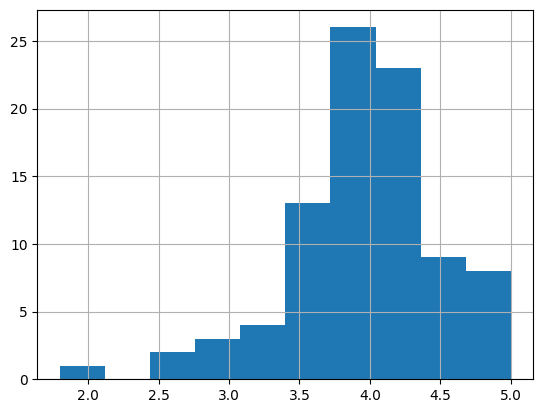

In [13]:
df.Rating.hist()

<Axes: >

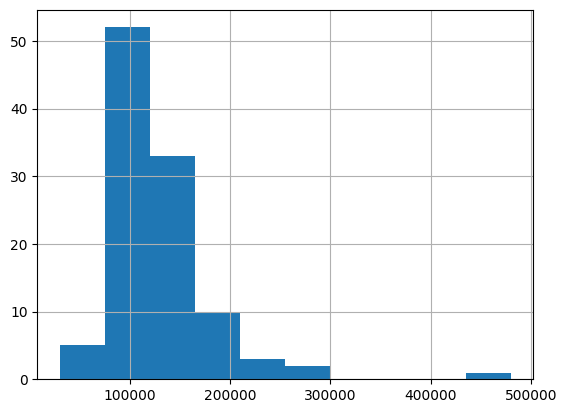

In [14]:
df.avg_salary.hist()

Text(0, 0.5, 'Advertised Positions')

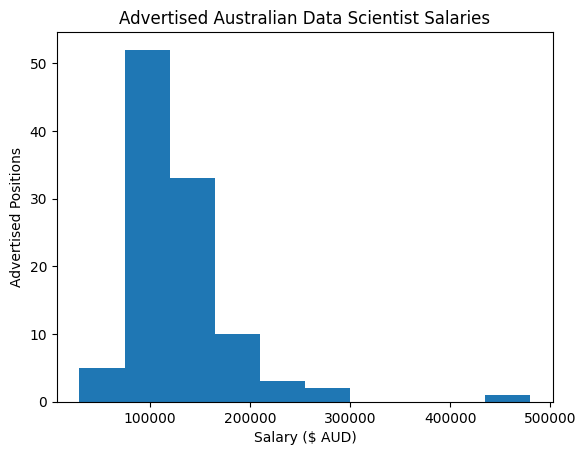

In [17]:
df['avg_salary'].plot(kind="hist", title="DS Salaries")
plt.title("Advertised Australian Data Scientist Salaries")
plt.xlabel("Salary ($ AUD)")
plt.ylabel("Advertised Positions")

<AxesSubplot:>

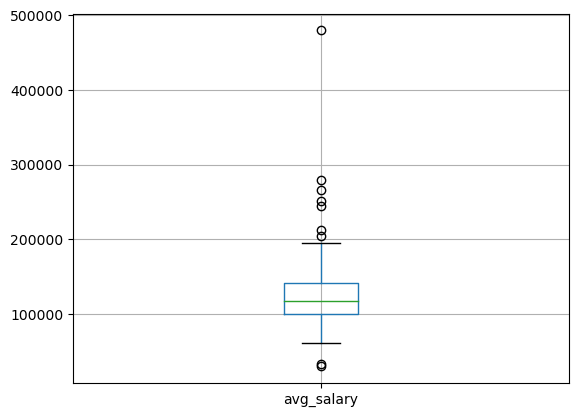

In [47]:
df.boxplot(column = 'avg_salary')

In [50]:
df[['avg_salary','Rating','python','desc_len']].corr()

,avg_salary,Rating,python,desc_len
avg_salary,1.000000,0.169429,0.000517,-0.008702
Rating,0.169429,1.000000,0.217533,0.081004
python,0.000517,0.217533,1.000000,0.298756
desc_len,-0.008702,0.081004,0.298756,1.000000


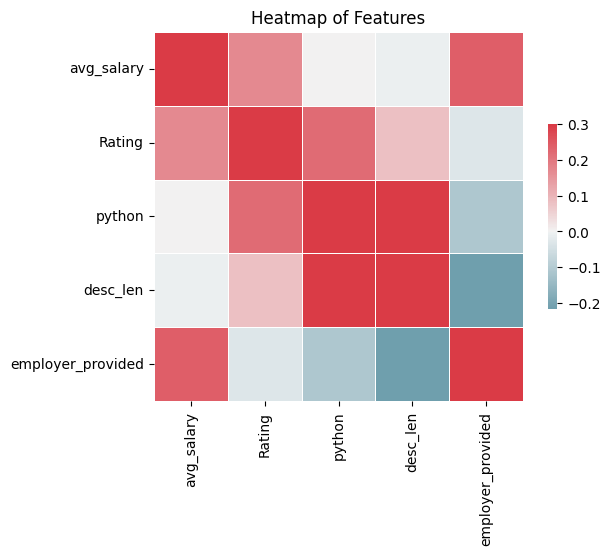

In [19]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['avg_salary','Rating','python','desc_len','employer_provided']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Heatmap of Features')  # Add main title
plt.show()

In [20]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'hourly', 'employer_provided', 'min_salary',
       'max_salary', 'avg_salary', 'python', 'azure', 'r studio', 'sql',
       'hadoop', 'spark', 'java', 'sas', 'tableau', 'hive', 'scala', 'aws',
       'tensorflow', 'c++', 'matlab', 'excel', 'job_simp', 'seniority',
       'desc_len'],
      dtype='object')

In [21]:
df_cat = df[['Location','Company Name','python', 'azure', 'r studio', 'sql',
       'hadoop', 'spark', 'java', 'sas', 'tableau', 'hive', 'scala', 'aws',
       'tensorflow', 'c++', 'matlab', 'excel', 'job_simp', 'seniority']]

Graph for Location , Total = Location
Sydney             46
Melbourne          29
Canberra            8
Brisbane            6
Adelaide            3
Darlinghurst        3
Clayton North       2
Hawthorn East       1
South Melbourne     1
Australia           1
Perth               1
Vermont             1
Research            1
Armidale            1
Redfern             1
Remote              1
Name: count, dtype: int64


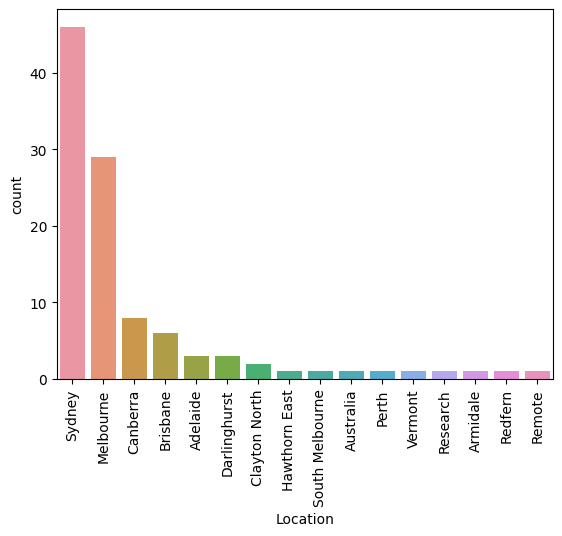

Graph for Company Name , Total = Company Name
Mutinex                       4
Charterhouse\n4.2             3
Monash University\n4.2        3
Hatch\n4.0                    3
CSIRO\n4.1                    3
                             ..
Aurecon Group\n3.8            1
Microsoft\n4.3                1
BI Group\n4.7                 1
ANDURIL INDUSTRIES\n4.6       1
PanAsia HR Resourcing\n1.8    1
Name: count, Length: 83, dtype: int64


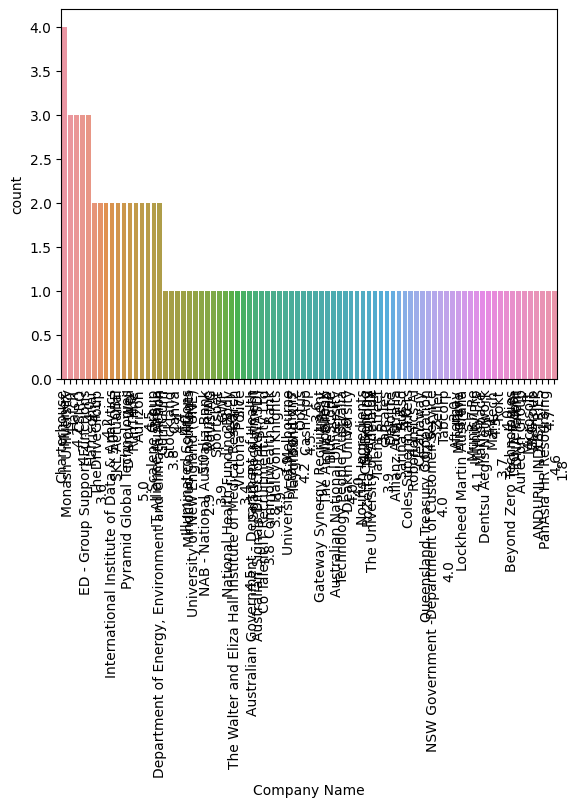

Graph for python , Total = python
0    98
1     8
Name: count, dtype: int64


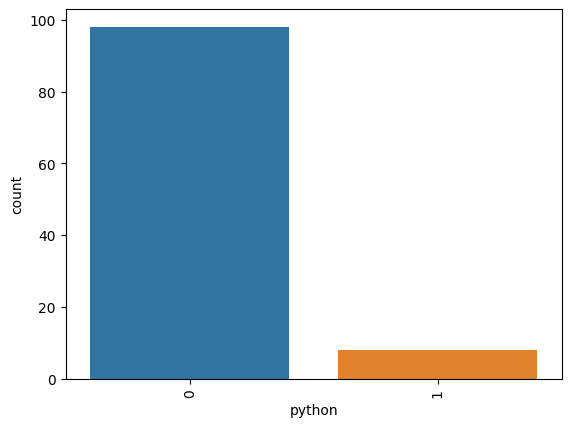

Graph for azure , Total = azure
0    100
1      6
Name: count, dtype: int64


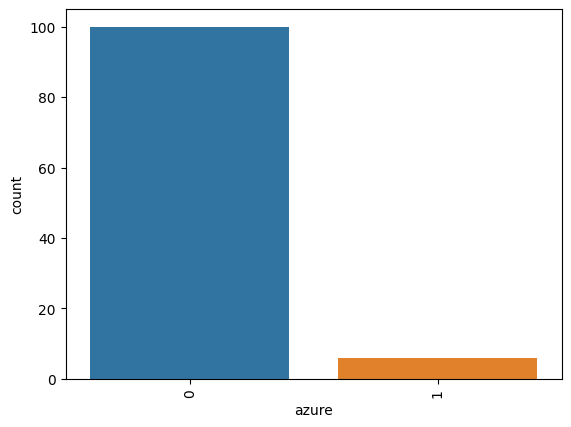

Graph for r studio , Total = r studio
0    106
Name: count, dtype: int64


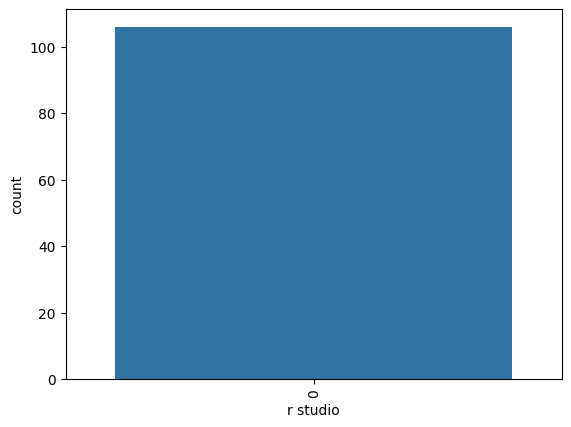

Graph for sql , Total = sql
0    101
1      5
Name: count, dtype: int64


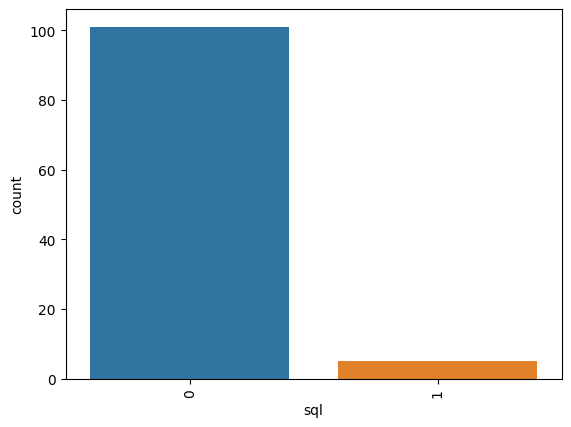

Graph for hadoop , Total = hadoop
0    105
1      1
Name: count, dtype: int64


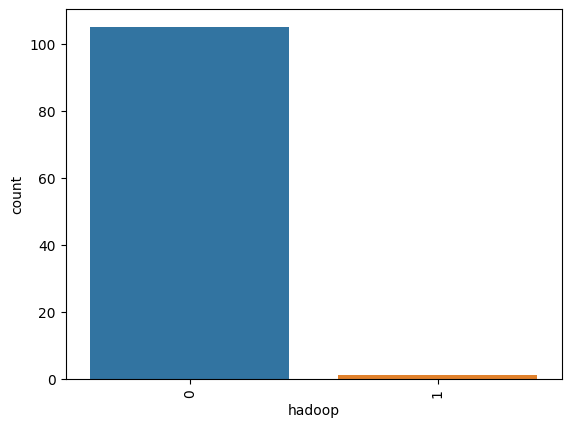

Graph for spark , Total = spark
0    106
Name: count, dtype: int64


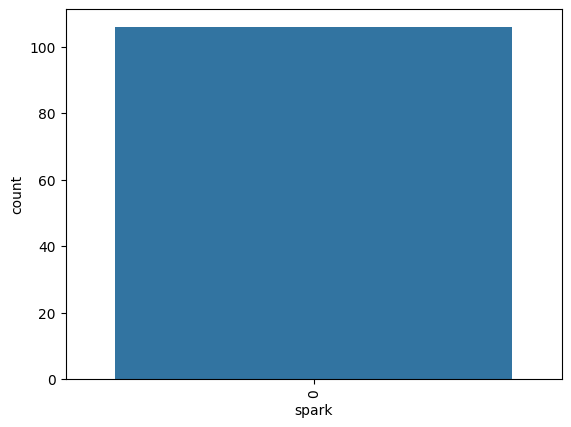

Graph for java , Total = java
0    105
1      1
Name: count, dtype: int64


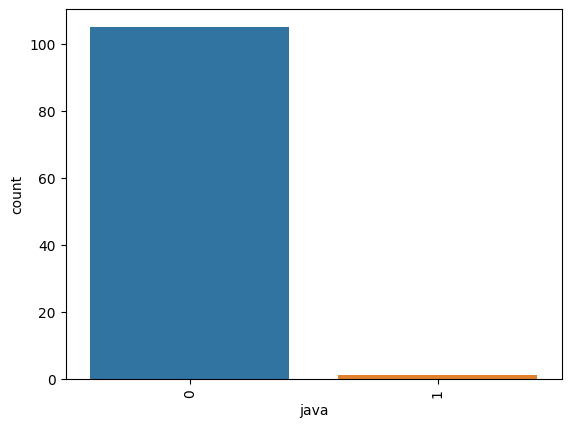

Graph for sas , Total = sas
0    105
1      1
Name: count, dtype: int64


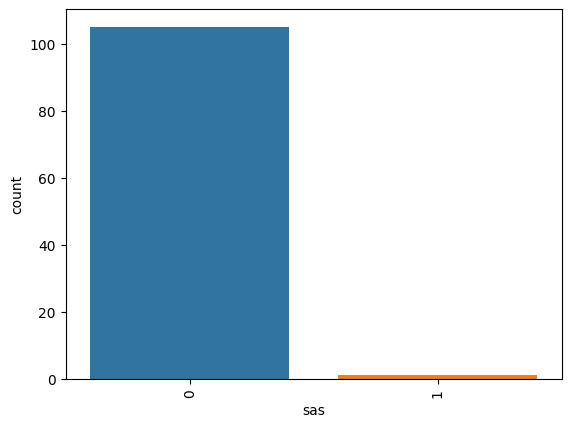

Graph for tableau , Total = tableau
0    106
Name: count, dtype: int64


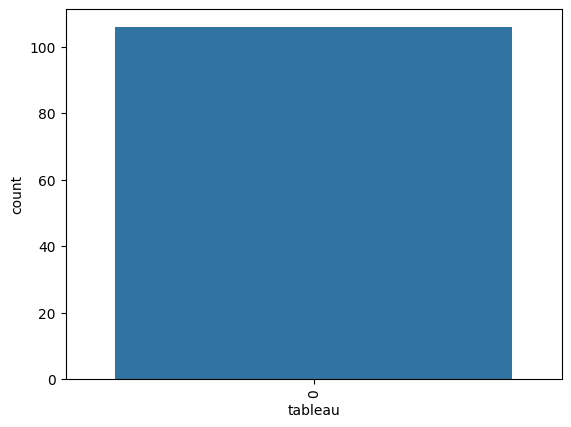

Graph for hive , Total = hive
0    104
1      2
Name: count, dtype: int64


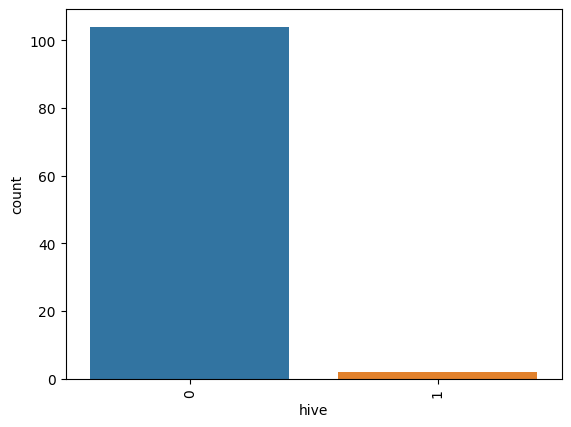

Graph for scala , Total = scala
0    103
1      3
Name: count, dtype: int64


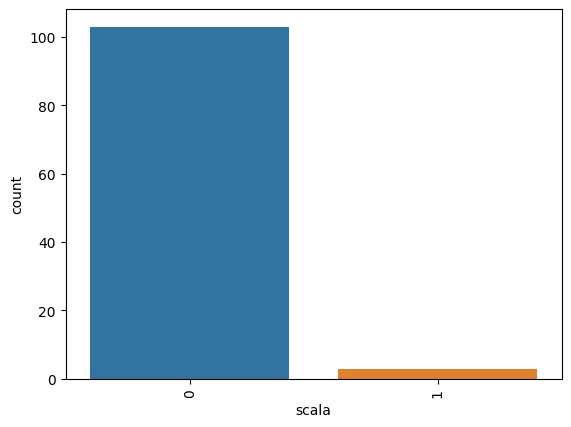

Graph for aws , Total = aws
0    101
1      5
Name: count, dtype: int64


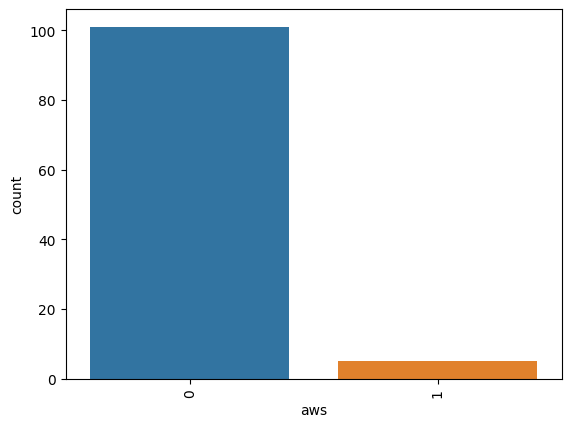

Graph for tensorflow , Total = tensorflow
0    106
Name: count, dtype: int64


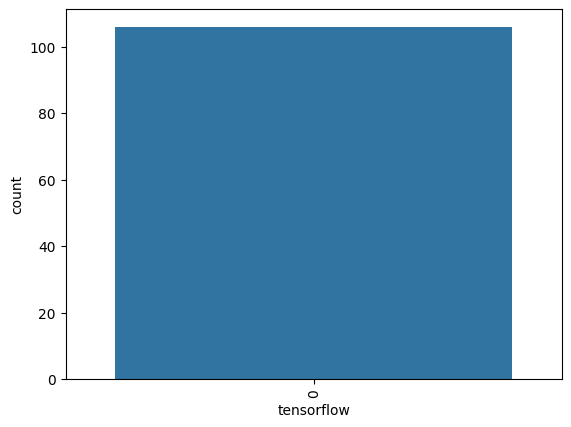

Graph for c++ , Total = c++
0    104
1      2
Name: count, dtype: int64


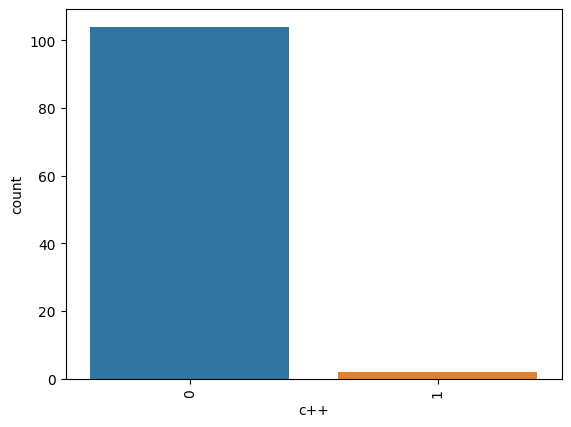

Graph for matlab , Total = matlab
0    105
1      1
Name: count, dtype: int64


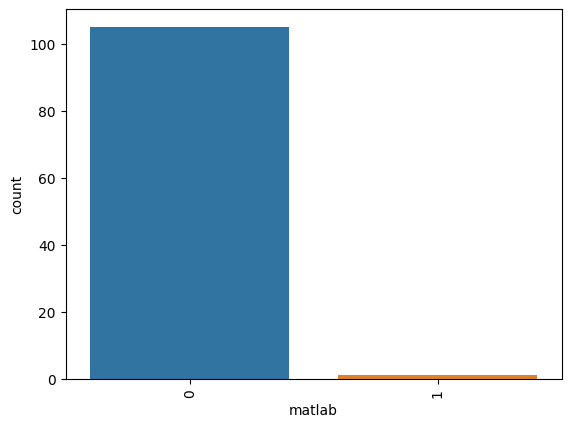

Graph for excel , Total = excel
0    99
1     7
Name: count, dtype: int64


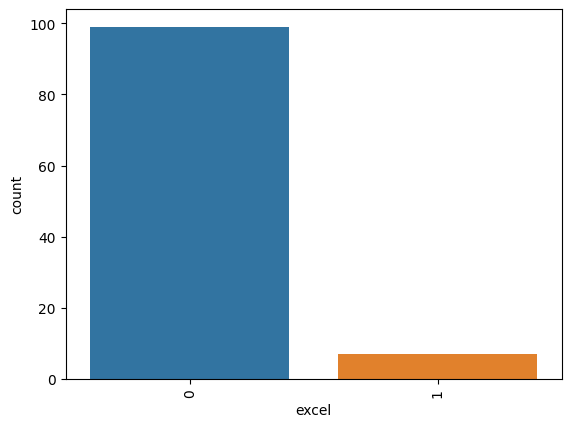

Graph for job_simp , Total = job_simp
data scientist    41
mle               39
na                 9
graduate           8
analyst            4
data engineer      3
manager            2
Name: count, dtype: int64


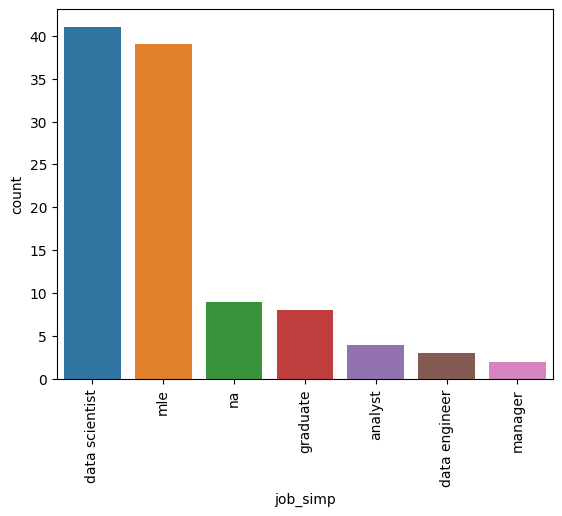

Graph for seniority , Total = seniority
na        77
senior    29
Name: count, dtype: int64


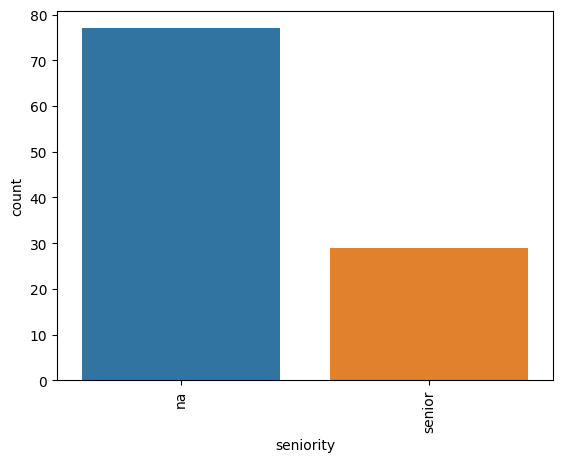

In [22]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print(f"Graph for {i} , Total = {cat_num}")
    chart = sns.barplot(x=cat_num.index, y =cat_num )
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

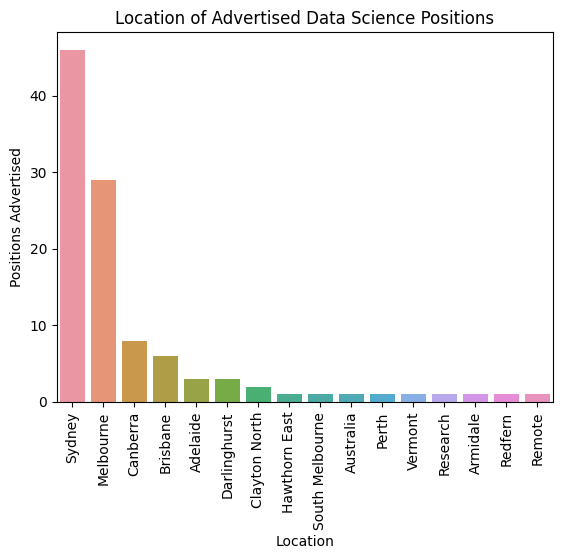

In [26]:
    cat_num = df_cat['Location'].value_counts()
    chart = sns.barplot(x=cat_num.index, y =cat_num.values )
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.title('Location of Advertised Data Science Positions')
    plt.xlabel('Location')
    plt.ylabel('Positions Advertised')
    plt.show()

Graph for Location , Total = Sydney             46
Melbourne          29
Canberra            8
Brisbane            6
Adelaide            3
Darlinghurst        3
Clayton North       2
Hawthorn East       1
South Melbourne     1
Australia           1
Perth               1
Vermont             1
Research            1
Armidale            1
Redfern             1
Remote              1
Name: Location, dtype: int64


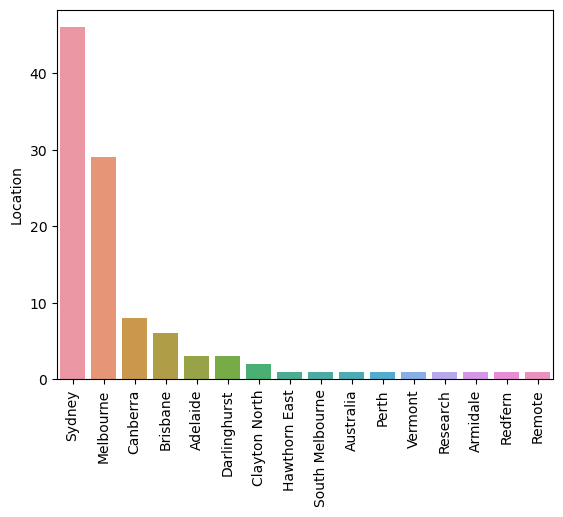

Graph for Company Name , Total = Mutinex                                                 4
Charterhouse\n4.2                                       3
Monash University\n4.2                                  3
Hatch\n4.0                                              3
CSIRO\n4.1                                              3
ED - Group Support Functions\n3.6                       2
Harrison.ai\n4.2                                        2
TheDriveGroup\n5.0                                      2
International Institute of Data & Analytics             2
SKL Actuarial                                           2
QBE\n4.0                                                2
D'Arcy Weil                                             2
Pyramid Global Technologies\n5.0                        2
RunTime\n4.5                                            2
Aurizon\n3.6                                            2
Scalene Group                                           2
Department of Energy, Environment and C

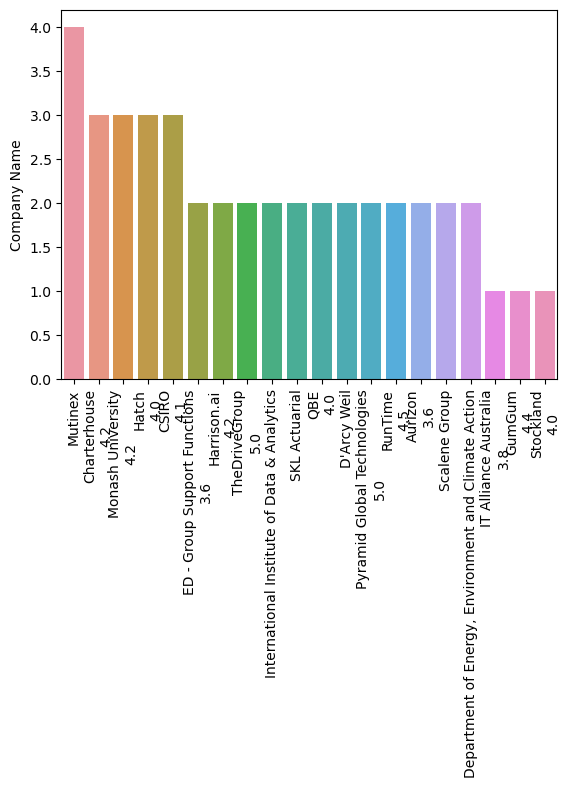

In [62]:
for i in df_cat[['Location','Company Name']]:
    cat_num = df_cat[i].value_counts()[:20]
    print(f"Graph for {i} , Total = {cat_num}")
    chart = sns.barplot(x=cat_num.index, y =cat_num )
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [65]:
pd.pivot_table(df,index=['job_simp','seniority'],values = 'avg_salary')

avg_salary
job_simp       seniority               
analyst        na          92666.666667
               senior      98000.000000
data engineer  na         138333.333333
data scientist na         134774.993548
               senior     137200.000000
graduate       na          96312.500000
manager        na         105250.000000
mle            na         122560.000000
               senior     163178.571429
na             na         112900.000000
               senior     108875.000000

In [70]:
pd.pivot_table(df, index = ['Location','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('Location',ascending = False)



avg_salary
Location        job_simp                  
Vermont         mle                      1
Sydney          na                       1
                mle                     17
                manager                  2
                graduate                 5
                data scientist          16
                data engineer            3
                analyst                  2
South Melbourne data scientist           1
Research        mle                      1
Remote          data scientist           1
Redfern         mle                      1
Perth           data scientist           1
Melbourne       graduate                 1
                na                       4
                mle                     11
                data scientist          12
                analyst                  1
Hawthorn East   data scientist           1
Darlinghurst    na                       1
                mle                      2
Clayton North   na                       1
                mle                      1
Canberra        data scientist           5
                mle                      2
                analyst                  1
Brisbane        na                       1
                mle                      1
                graduate                 1
                data scientist           3
Australia       data scientist           1
Armidale        na                       1
Adelaide        mle                      2
                graduate                 1

In [71]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'Location', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
Location,
Australia,252000.000000
Canberra,162500.000000
Remote,150000.000000
Sydney,141001.550000
Melbourne,116791.666667
Brisbane,115500.000000
Perth,115500.000000
South Melbourne,112000.000000
Hawthorn East,104000.000000


In [76]:
df_pivots = df[['Rating','Location', 'hourly', 'employer_provided', 'python', 'azure', 'r studio', 'sql',
       'hadoop', 'spark', 'java', 'sas', 'tableau', 'hive', 'scala', 'aws',
       'tensorflow', 'c++', 'matlab', 'excel','avg_salary']]

In [77]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
           avg_salary
Rating               
4.3     161125.000000
4.7     161000.000000
1.8     150000.000000
4.4     146250.000000
4.2     144541.666667
3.4     144250.000000
5.0     142666.666667
4.9     140000.000000
3.7     133375.000000
4.5     120500.000000
4.0     120361.111111
2.9     117500.000000
3.6     116312.500000
3.0     113500.000000
4.6     111500.000000
3.3     109000.000000
3.9     107500.000000
3.5     104500.000000
4.1      99785.714286
3.8      97375.000000
2.7      82500.000000
Location
                    avg_salary
Location                      
Australia        252000.000000
Redfern          195000.000000
Remote           150000.000000
Canberra         142937.500000
Sydney           136663.582609
Adelaide         134666.666667
Darlinghurst     129000.000000
Clayton North    121000.000000
Research         118000.000000
Vermont          118000.000000
Perth            115500.000000
Melbourne        113017.241379
Armidale         112500.000000
South Melbour

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [78]:
pd.pivot_table(df_pivots,index = 'Location', columns = 'python',values = 'avg_salary',aggfunc = 'count')

python,0,1
Location,,
Adelaide,3.0,NaN
Armidale,1.0,NaN
Australia,1.0,NaN
Brisbane,6.0,NaN
Canberra,7.0,1.0
Clayton North,2.0,NaN
Darlinghurst,3.0,NaN
Hawthorn East,1.0,NaN
Melbourne,26.0,3.0


In [83]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install wordcloud

     -------------------------------------- 153.3/153.3 kB 3.0 MB/s eta 0:00:00


In [84]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [89]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\benss\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\benss\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

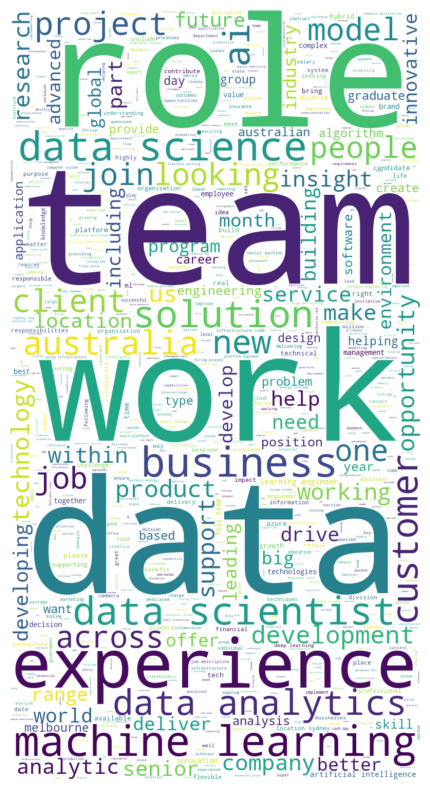

In [91]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()